In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
plt.style.use('dark_background')

In [2]:
dataset = pd.read_csv("emails.csv")
dataset

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
dataset.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
dataset.nunique()

Email No.     5172
the             90
to              72
ect             90
and             53
              ... 
military         4
allowing         3
ff              23
dry              4
Prediction       2
Length: 3002, dtype: int64

In [6]:
LE = LabelEncoder()
dataset["Email No."] = LE.fit_transform(dataset["Email No."])
dataset

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,2222,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3333,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,4444,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,4632,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,4633,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,4635,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,4636,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [7]:
x = dataset.iloc[:,:-1].values
x

array([[   0,    0,    0, ...,    0,    0,    0],
       [1111,    8,   13, ...,    0,    1,    0],
       [2222,    0,    0, ...,    0,    0,    0],
       ...,
       [4635,    0,    0, ...,    0,    0,    0],
       [4636,    2,    7, ...,    0,    1,    0],
       [4637,   22,   24, ...,    0,    0,    0]], dtype=int64)

In [8]:
y = dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [9]:
SC = StandardScaler()
x[:,:] = SC.fit_transform(x[:,:])

In [10]:
X = pd.DataFrame(x)
X

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
0,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,1,2,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5169,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5170,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

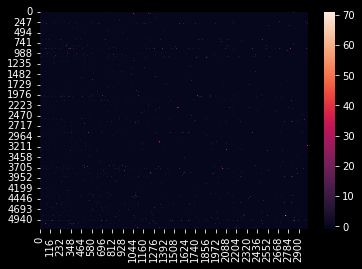

In [11]:
sns.heatmap (x)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

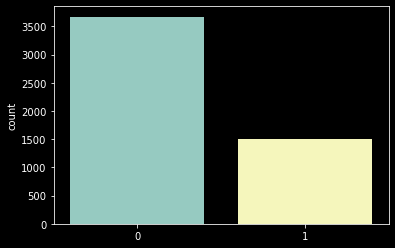

In [12]:
sns.countplot (y)

<AxesSubplot:>

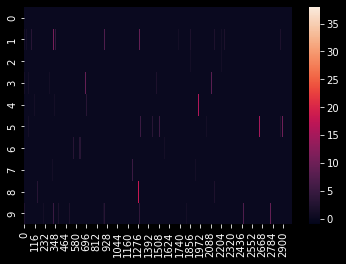

In [13]:
sns.heatmap (X.head(10))

In [14]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size = 0.2,random_state = 0)

In [15]:
x_train

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [-1,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [16]:
x_test

array([[ 0,  0,  0, ...,  0,  0,  0],
       [-1,  0,  0, ...,  0,  0,  0],
       [ 1,  2,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [17]:
y_train

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [18]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# SVC (ACC = 55%)

In [19]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [20]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
df_comp_1 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp_1

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1030,0,0
1031,1,1
1032,1,1
1033,0,0


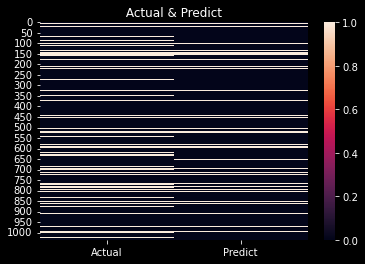

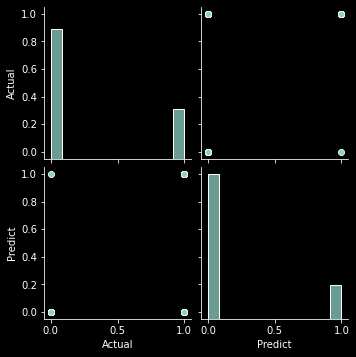

In [22]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_1)
sns.pairplot(df_comp_1)

In [23]:
print(r2_score(y_test, y_pred))

0.5496842105263158


# RandomForestClassifier (ACC = 83%)

In [24]:
RFC=RandomForestClassifier(n_estimators=1500,random_state=0)
RFC.fit(x_train,y_train)
y_pred_2 = RFC.predict(x_test)
y_pred_2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [25]:
df_comp_2 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_2})
df_comp_2

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1030,0,0
1031,1,1
1032,1,1
1033,0,0


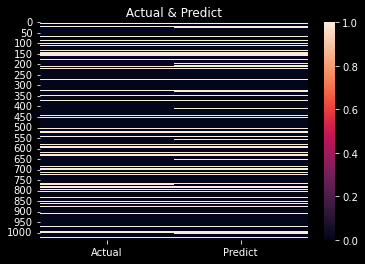

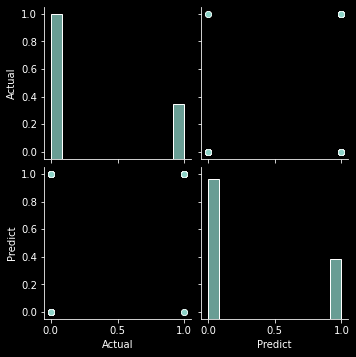

In [26]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_2)
sns.pairplot(df_comp_2)

In [27]:
print(r2_score(y_test, y_pred_2))

0.8305263157894737


# LogisticRegression (ACC = 79.2%)

In [28]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_6 = LR.predict(x_test)
y_pred_6

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [29]:
df_comp_3 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_6})
df_comp_3

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1030,0,0
1031,1,1
1032,1,1
1033,0,0


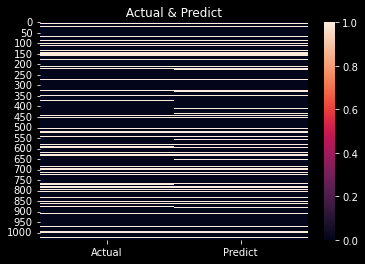

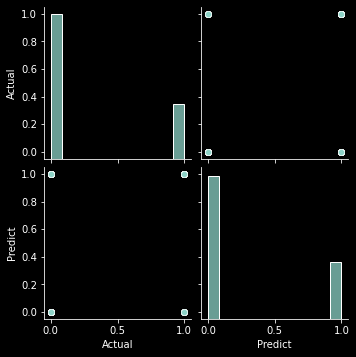

In [30]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_3)
sns.pairplot(df_comp_3)

In [31]:
print(r2_score(y_test, y_pred_6))

0.7917894736842105


# DecisionTreeClassifier (ACC = 48%)

In [32]:
DTC = DecisionTreeClassifier ()
DTC.fit(x_train,y_train)
y_pred_5 = DTC.predict(x_test)
y_pred_5

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [33]:
df_comp_4 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_5})
df_comp_4

,Actual,Predict
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1030,0,0
1031,1,1
1032,1,1
1033,0,0


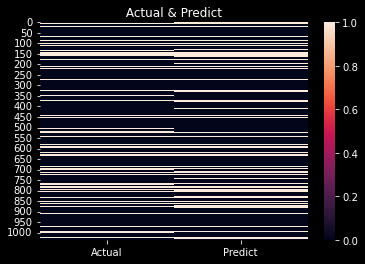

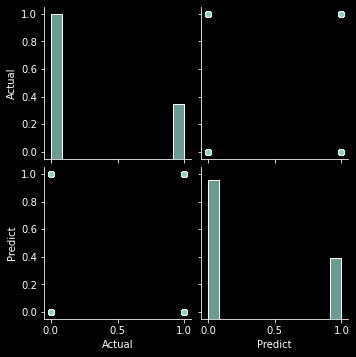

In [34]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_4)
sns.pairplot(df_comp_4)

In [35]:
print(r2_score(y_test, y_pred_5))

0.48189473684210526
